In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

## Loading the dataset

In [22]:
df=pd.read_csv("C:\\Users\\owais\\OneDrive\\Desktop\\Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## On the above Dataset i am building a predictive model , that will predict the House prices againsts the given input variables

In [23]:
#to check for missing values in dataset:

In [24]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [25]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [26]:
# List of categorical columns
columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning' ,'prefarea']

# Convert "yes" to 1 and 'no' to 0
df[columns] = df[columns].applymap(lambda x: 1 if x == 'yes' else 0)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [27]:
df["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [28]:
df["furnishingstatus"]=df["furnishingstatus"].replace({'furnished':0,'semi-furnished':1, 'unfurnished': 2})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [29]:
print("total number of sample",len(df))

total number of sample 545


In [30]:
# Normalize the 'area' column using Min-Max scaling
df["area"] = (df['area'] - df['area'].min()) / (df['area'].max() - df['area'].min())
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,4,2,3,1,0,0,0,1,2,1,0
1,12250000,0.502405,4,4,4,1,0,0,0,1,3,0,0
2,12250000,0.571134,3,2,2,1,0,1,0,0,2,1,1
3,12215000,0.402062,4,2,2,1,0,1,0,1,3,1,0
4,11410000,0.396564,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,0.092784,2,1,1,1,0,1,0,0,2,0,2
541,1767150,0.051546,3,1,1,0,0,0,0,0,0,0,1
542,1750000,0.135395,2,1,1,1,0,0,0,0,0,0,2
543,1750000,0.086598,3,1,1,0,0,0,0,0,0,0,0


In [31]:
# removing the outliers using the standard derivation approach
#___outliers is calculated as, if the Z-score of each data point |xi-x(mean)|/x(std)>3___#

In [32]:
df=df[(np.abs(df["area"]-df["area"].mean())/df["area"].std() <3)]
df=df[(np.abs(df["prefarea"]-df["prefarea"].mean())/df["prefarea"].std() <3)]
df=df[(np.abs(df["guestroom"]-df["guestroom"].mean())/df["guestroom"].std() <3)]
df=df[(np.abs(df["basement"]-df["basement"].mean())/df["basement"].std() <3)]
df=df[(np.abs(df["parking"]-df["parking"].mean())/df["parking"].std()<3)]

In [33]:
print(" After removing outliers, total number of sample: ",len(df))

 After removing outliers, total number of sample:  538


In [34]:
#Separating our "x" variable "y" variable 
x=df.drop(["price"],axis=1)

y=df["price"]

In [35]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.396564,4,2,3,1,0,0,0,1,2,1,0
1,0.502405,4,4,4,1,0,0,0,1,3,0,0
2,0.571134,3,2,2,1,0,1,0,0,2,1,1
3,0.402062,4,2,2,1,0,1,0,1,3,1,0
4,0.396564,4,1,2,1,1,1,0,1,2,0,0


In [36]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

## Exploratory Data Analysis

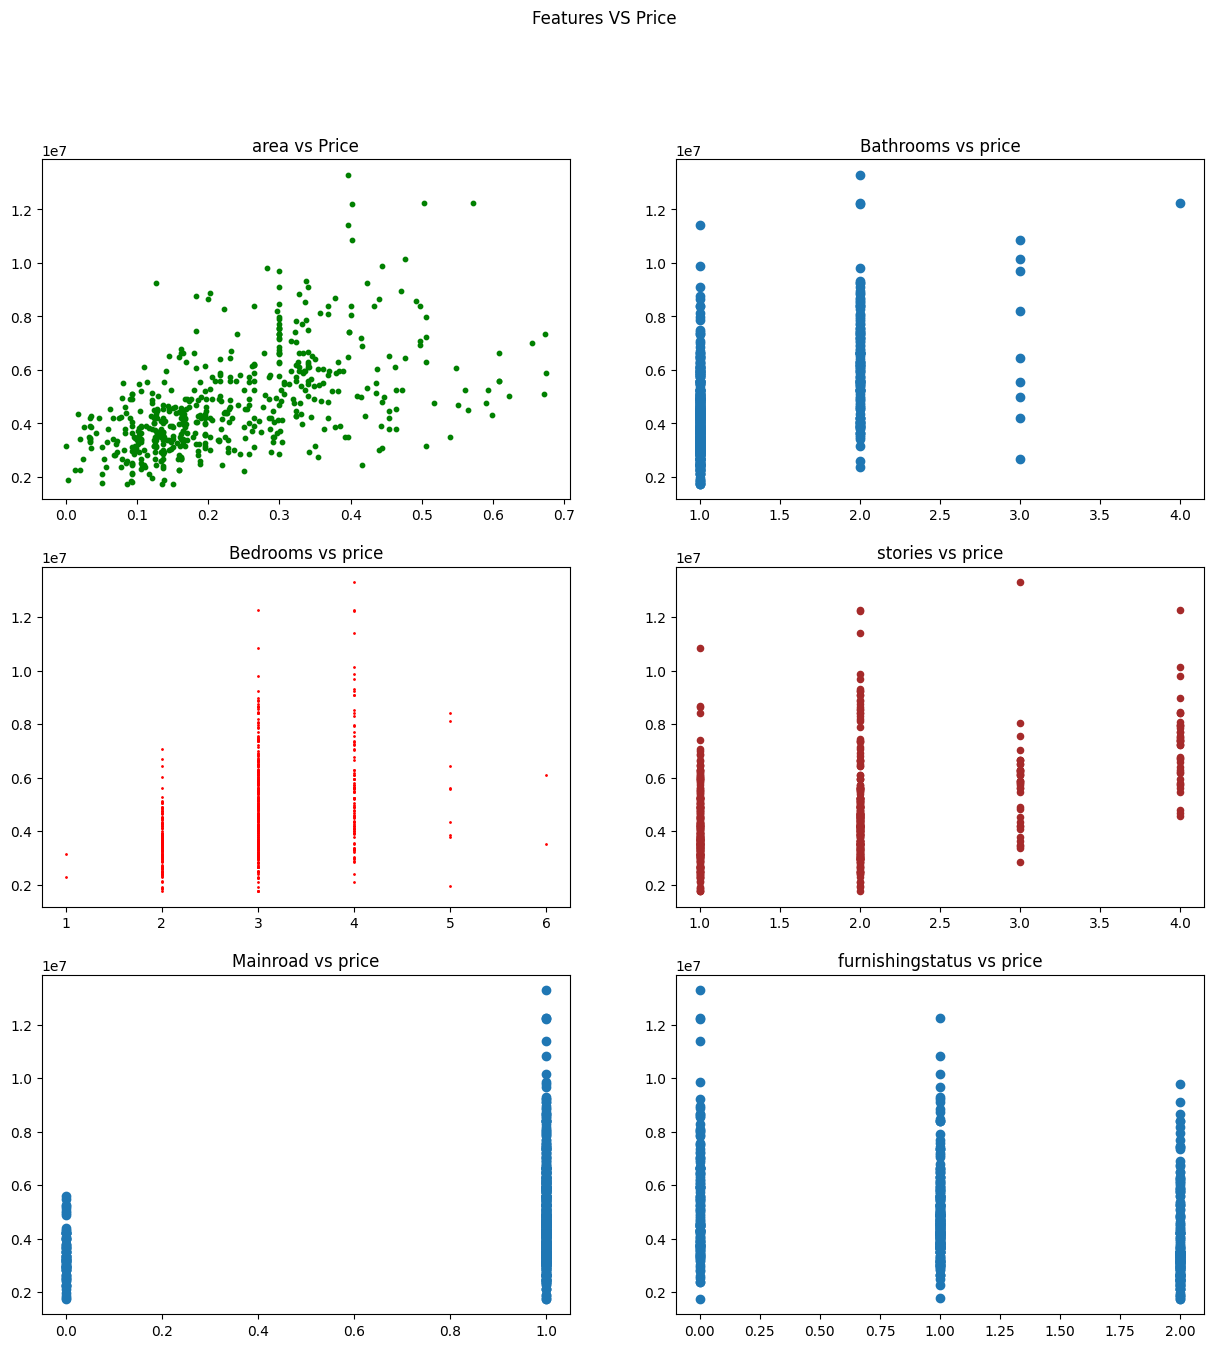

In [37]:
fig, axs= plt.subplots(3,2,figsize=(15,15))
fig.suptitle("Features VS Price")
axs[0,0].scatter(df["area"],df["price"],s=10,color="green")
axs[0,0].set_title("area vs Price")
axs[0,1].scatter(df["bathrooms"],df["price"])
axs[0,1].set_title("Bathrooms vs price")
axs[1,0].scatter(df["bedrooms"],df["price"],s=1,color="red")
axs[1,0].set_title("Bedrooms vs price")
axs[1,1].scatter(df["stories"],df["price"],color="brown",s=20)
axs[1,1].set_title("stories vs price")
axs[2,0].scatter(df["mainroad"],df["price"])
axs[2,0].set_title("Mainroad vs price")
axs[2,1].scatter(df["furnishingstatus"],df["price"])
axs[2,1].set_title("furnishingstatus vs price")
plt.show()

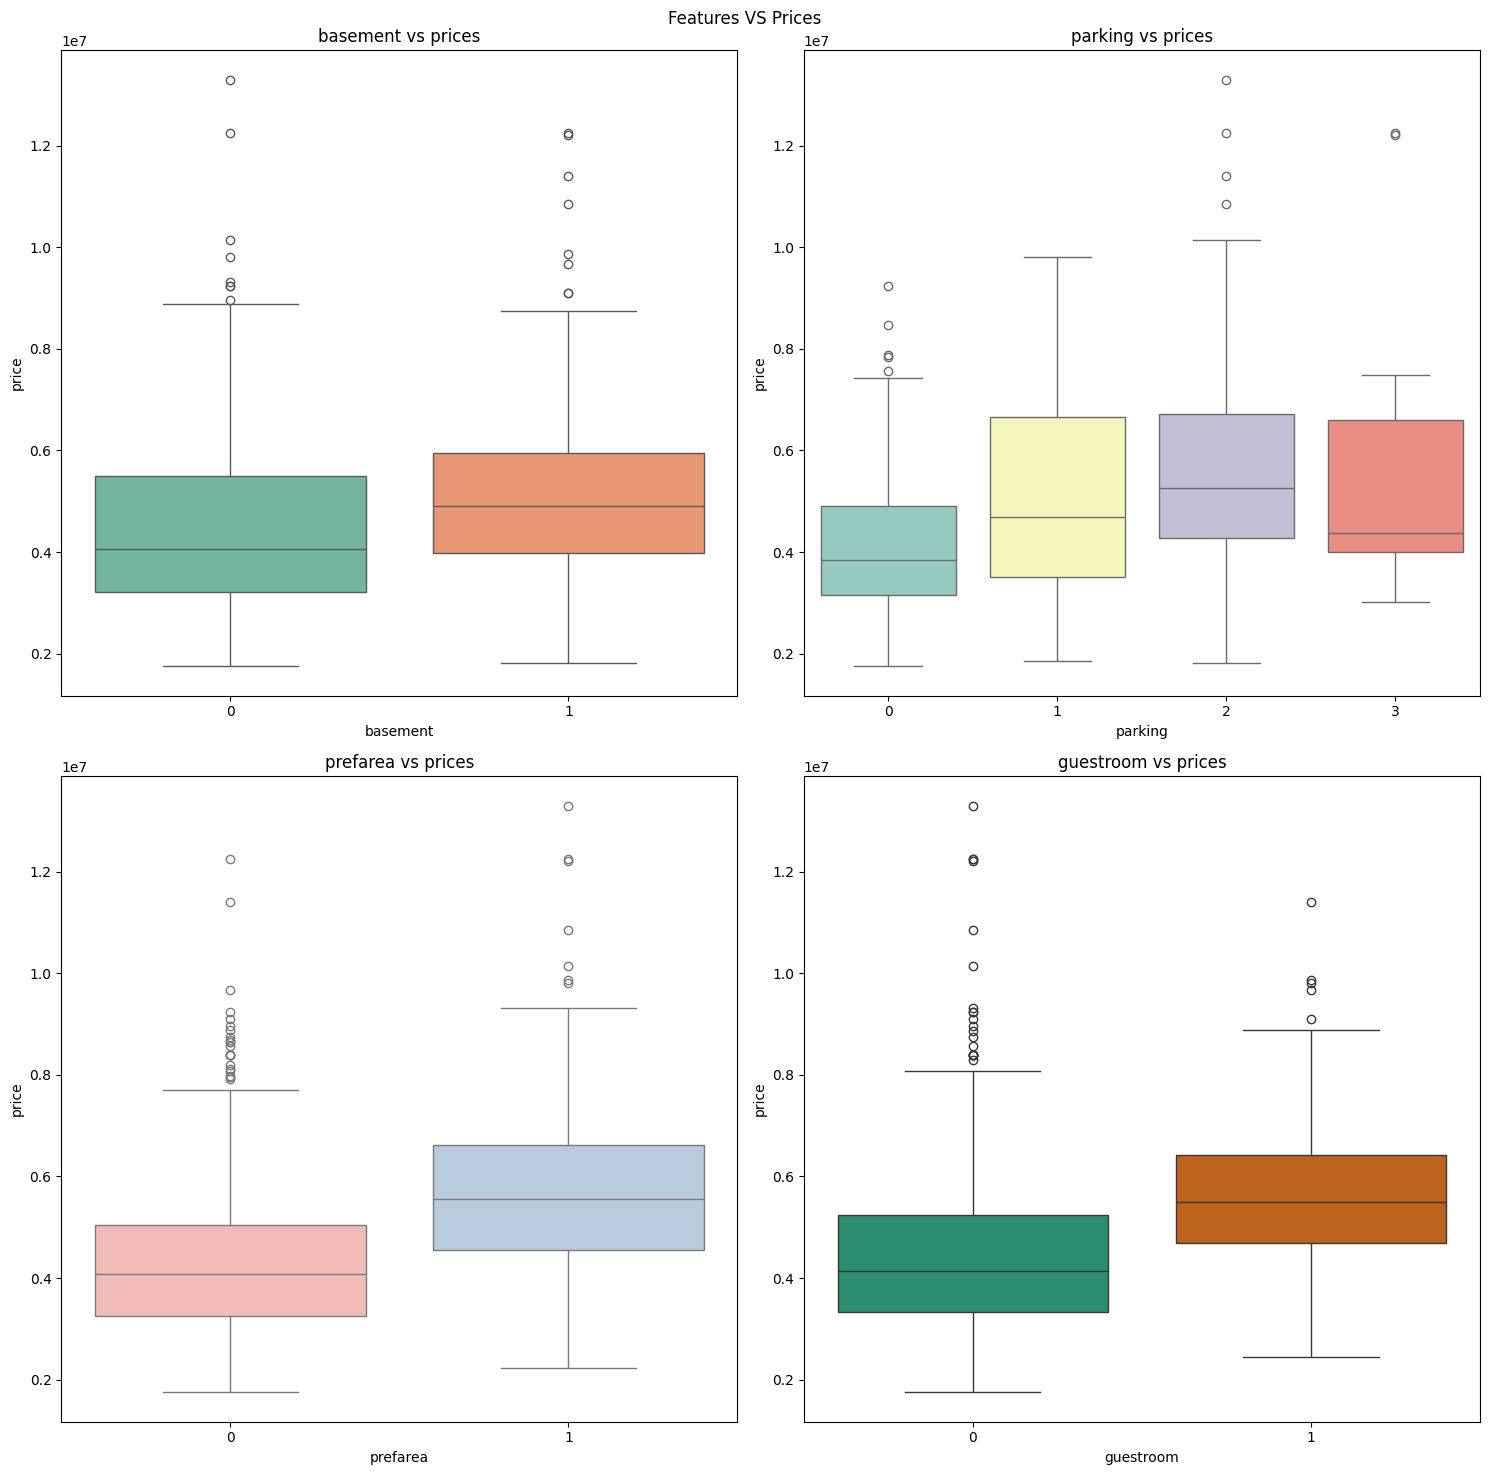

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("Features VS Prices")

sns.boxplot(x="basement", y="price", data=df, ax=axs[0, 0], palette="Set2")
axs[0, 0].set_title("basement vs prices")

sns.boxplot(x="parking", y="price", data=df, ax=axs[0, 1], palette="Set3")
axs[0, 1].set_title("parking vs prices")

sns.boxplot(x="prefarea", y="price", data=df, ax=axs[1, 0], palette="Pastel1")
axs[1, 0].set_title("prefarea vs prices")

sns.boxplot(x="guestroom", y="price", data=df, ax=axs[1, 1], palette="Dark2")
axs[1, 1].set_title("guestroom vs prices")

plt.tight_layout()
plt.show()

## Model Building & Model Testing

In [39]:
# Dividing the dataset into training and testing subsets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1)

In [40]:
print("total sample for training:",len(x_train))
print("total sample for testing:",len(x_test))

total sample for training: 430
total sample for testing: 108


In [41]:
# Displaying the first few rows of x_train
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
89,0.476289,5,3,2,1,0,0,0,0,2,0,0
522,0.056701,3,1,2,1,0,0,0,0,0,0,0
151,0.189003,4,1,2,1,0,0,0,1,2,1,1
529,0.159450,3,1,2,1,0,1,0,0,0,0,2
229,0.550997,4,2,2,1,1,1,0,0,1,0,1


In [42]:
# Displaying the first few rows of x_test
x_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
164,0.347766,3,2,2,1,1,1,0,0,1,1,0
404,0.223368,3,1,2,0,0,0,0,0,0,0,2
329,0.158763,3,1,2,1,0,0,0,0,0,0,0
407,0.034021,3,1,3,1,0,0,0,0,0,1,0
243,0.061856,3,1,2,1,0,1,0,0,0,0,0


In [43]:
from sklearn.ensemble import GradientBoostingRegressor

In [44]:
Model_1=GradientBoostingRegressor()
Model_1.fit(x_train,y_train)

GradientBoostingRegressor()

In [45]:
y_test_pred=Model_1.predict(x_test)

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.7082808652644207

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(x_test)
print(" R²:", r2_score(y_test, y_test_pred))


 R²: 0.7466765896854228


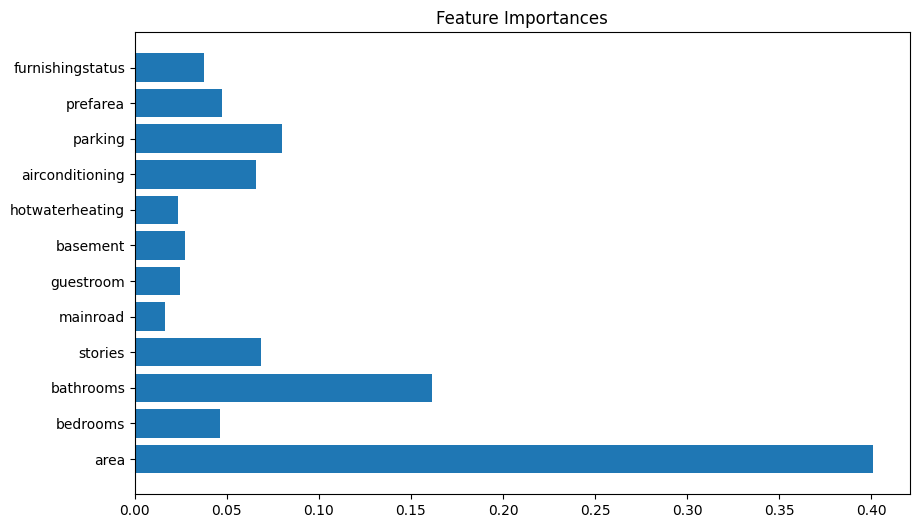

In [48]:
import matplotlib.pyplot as plt

importances = best_model.feature_importances_
features = x_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("Feature Importances")
plt.show()


Since, i had tried above GradientBoostingRegressor and also Applied GridSearchCV but Still the model's performance stacked under "75" percent Score 

In [49]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, max_depth=7, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("R² (Random Forest):", r2_score(y_test, y_pred))


R² (Random Forest): 0.7219348078143806


In [50]:
# Feature importance__
importances = best_model.feature_importances_
features = x_train.columns

# Threshold__
threshold = 0.05
low_importance_features = features[importances < threshold]

print("Low importance features:", list(low_importance_features))

x_train_reduced = x_train.drop(columns=low_importance_features)
x_test_reduced = x_test.drop(columns=low_importance_features)

# Model fitting__
best_model.fit(x_train_reduced, y_train)
y_pred_reduced = best_model.predict(x_test_reduced)

from sklearn.metrics import r2_score
print("R² after removing low-importance features:", r2_score(y_test, y_pred_reduced))


Low importance features: ['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'prefarea', 'furnishingstatus']
R² after removing low-importance features: 0.6470897254392489


In [51]:
model1 = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
x_train_reduced = x_train.drop(columns=low_importance_features)
x_test_reduced = x_test.drop(columns=low_importance_features)
model1.fit(x_train_reduced, y_train)
y_pred_reduced = model1.predict(x_test_reduced)

print("R² (Random Forest):", r2_score(y_test, y_pred_reduced))


R² (Random Forest): 0.5858303461276855


# conclusion

In [ ]:
# After testing various models, it was the GradientBoostingRegressor with the GridSearchCV that gave the best score.